In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [3]:
dat = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [4]:
dat['InvoiceDate'] = pd.to_datetime(dat['InvoiceDate'])
dat.CustomerID = dat.CustomerID.astype(object)
dat.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
dat.isnull().sum()
dat.isnull().sum() / dat.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [7]:
dat = dat.dropna()
dat.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
#No of cancelled transactions
dat["IsCancelled"]=np.where(dat.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
dat.IsCancelled.value_counts() / dat.shape[0] * 100


False    97.81112
True      2.18888
Name: IsCancelled, dtype: float64

In [9]:
dat = dat.loc[dat.IsCancelled==False].copy()
dat = dat.drop("IsCancelled", axis=1)

In [10]:
dat.StockCode.nunique(), dat.Description.nunique()

(3665, 3877)

We have 3665 unique StockCodes and 3877 unique Descriptions which aligns with the fact that the retailer sells many different types of products. Lets take a look at the most common stockcodes and descriptions being sold

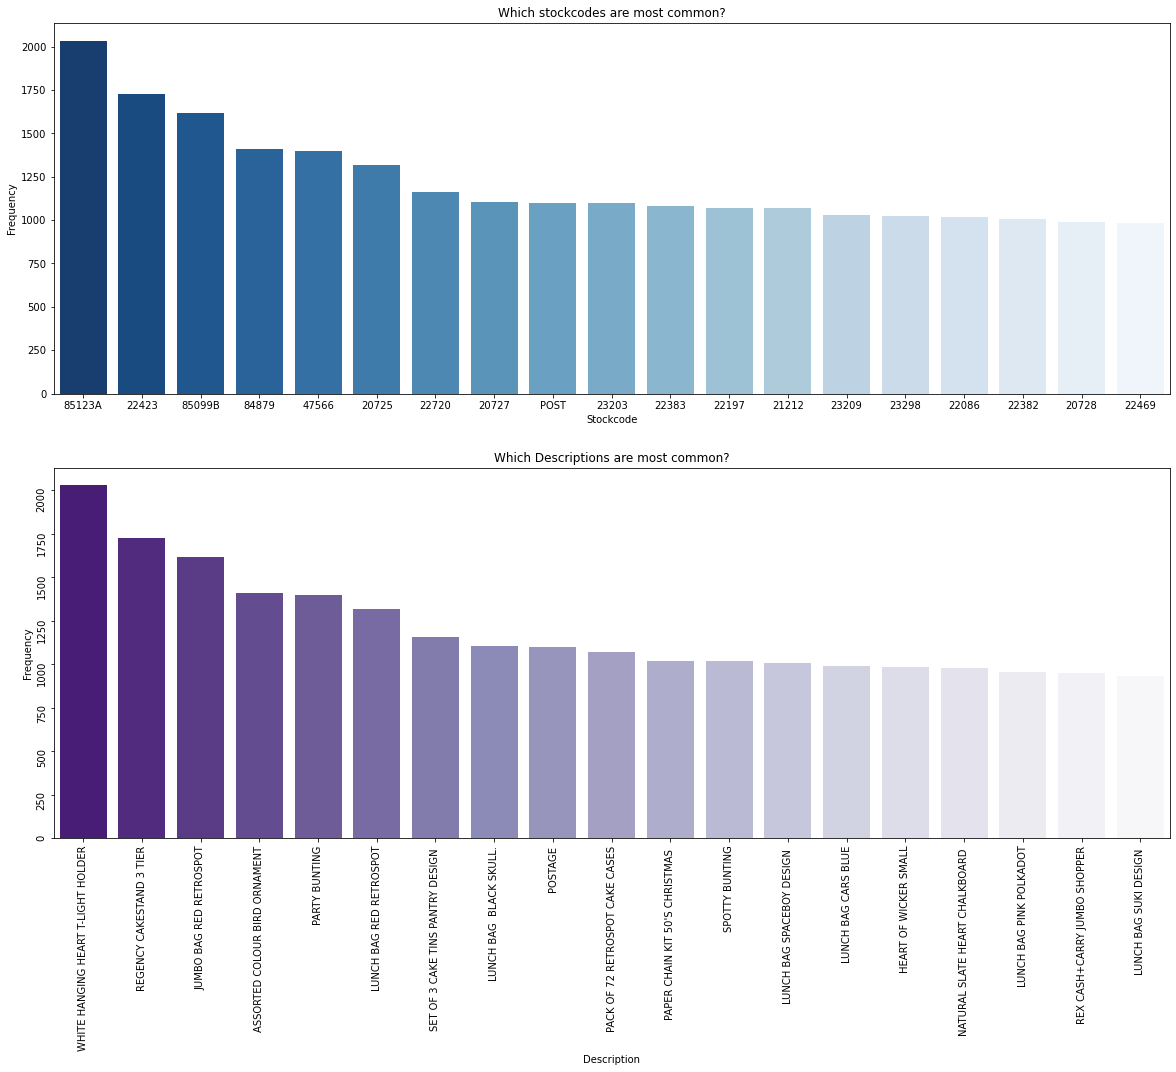

In [11]:
stockcode_frequency = dat.StockCode.value_counts().sort_values(ascending=False)
description_frequency = dat.Description.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_frequency.iloc[0:19].index,
            stockcode_frequency.iloc[0:19].values,
            ax = ax[0], palette="Blues_r")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?");
sns.barplot(description_frequency.iloc[0:19].index,
            description_frequency.iloc[0:19].values,
            ax = ax[1], palette="Purples_r")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Description")
ax[1].tick_params(labelrotation=90)

ax[1].set_title("Which Descriptions are most common?");

We can see that our top 20 most frequent stockcodes and descriptions generally match up with eachother in terms of level of frequency so we can say it is true that majority of the descriptions are consistent with the stockcodes except for some exceptions causing slight differences in the amount of stockcodes vs descriptions

Customers and Countries

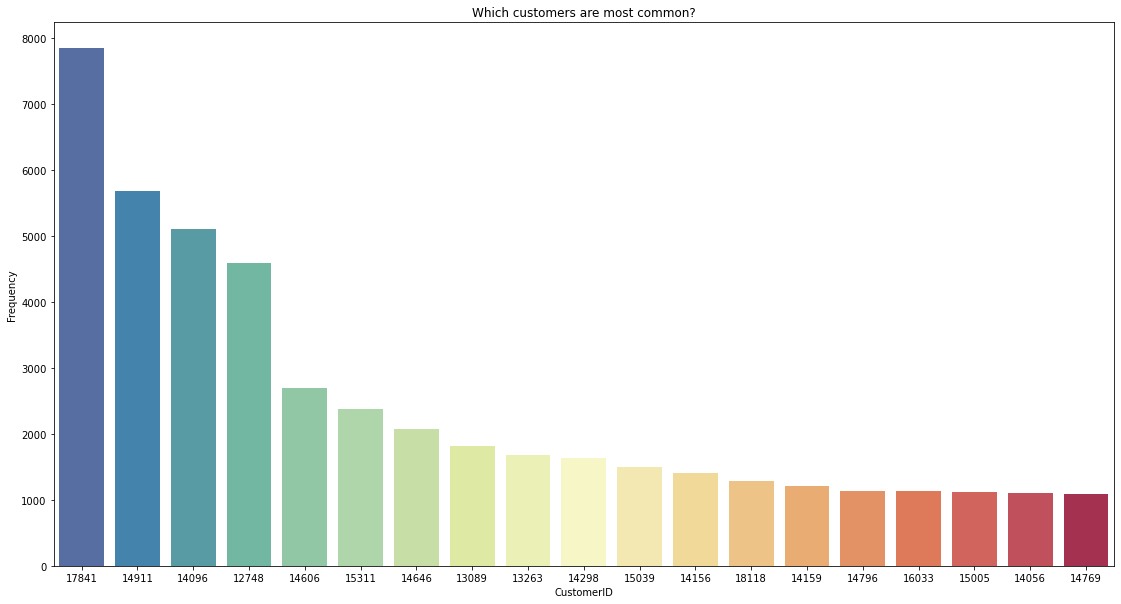

In [12]:
customer_frequency = dat.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
plt.figure(figsize=(19,10))
customer_frequency.index = customer_frequency.index.astype('Int64') 
sns.barplot(customer_frequency.index, customer_frequency.values, order=customer_frequency.index, palette="Spectral_r")
plt.ylabel("Frequency")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

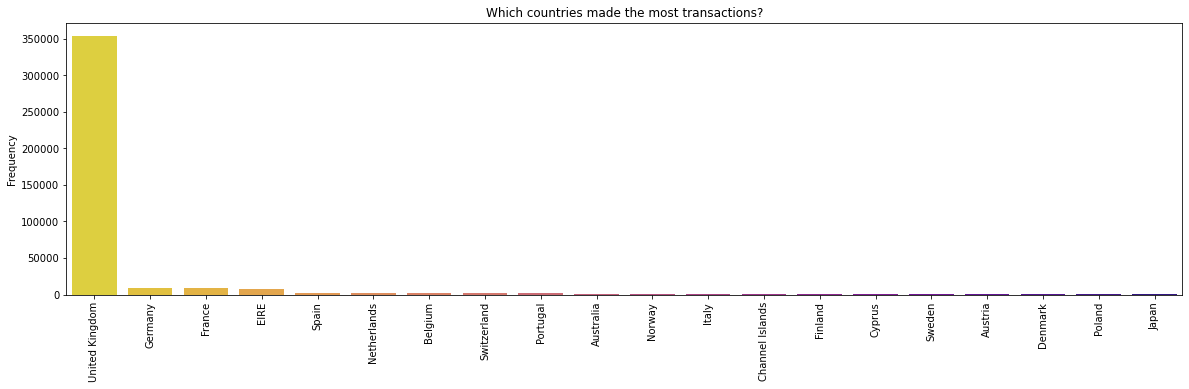

In [13]:
country_frequency = dat.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_frequency.index, country_frequency.values, palette="plasma_r")
plt.ylabel("Frequency")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90)

It is clear that the vast majority of transactions take place in the United Kingdom. Lets see if our top 20 Customers purchase their items in the United Kingdom or in other countries.

In [14]:
x = dat.groupby(['CustomerID','Country']).size().sort_values(ascending=False).iloc[0:19]
pd.DataFrame(x)

0
CustomerID Country             
17841.0    United Kingdom  7847
14911.0    EIRE            5677
14096.0    United Kingdom  5111
12748.0    United Kingdom  4596
14606.0    United Kingdom  2700
15311.0    United Kingdom  2379
14646.0    Netherlands     2080
13089.0    United Kingdom  1818
13263.0    United Kingdom  1677
14298.0    United Kingdom  1637
15039.0    United Kingdom  1502
14156.0    EIRE            1400
18118.0    United Kingdom  1279
14159.0    United Kingdom  1204
14796.0    United Kingdom  1141
16033.0    United Kingdom  1137
15005.0    United Kingdom  1119
14056.0    United Kingdom  1106
14769.0    United Kingdom  1090

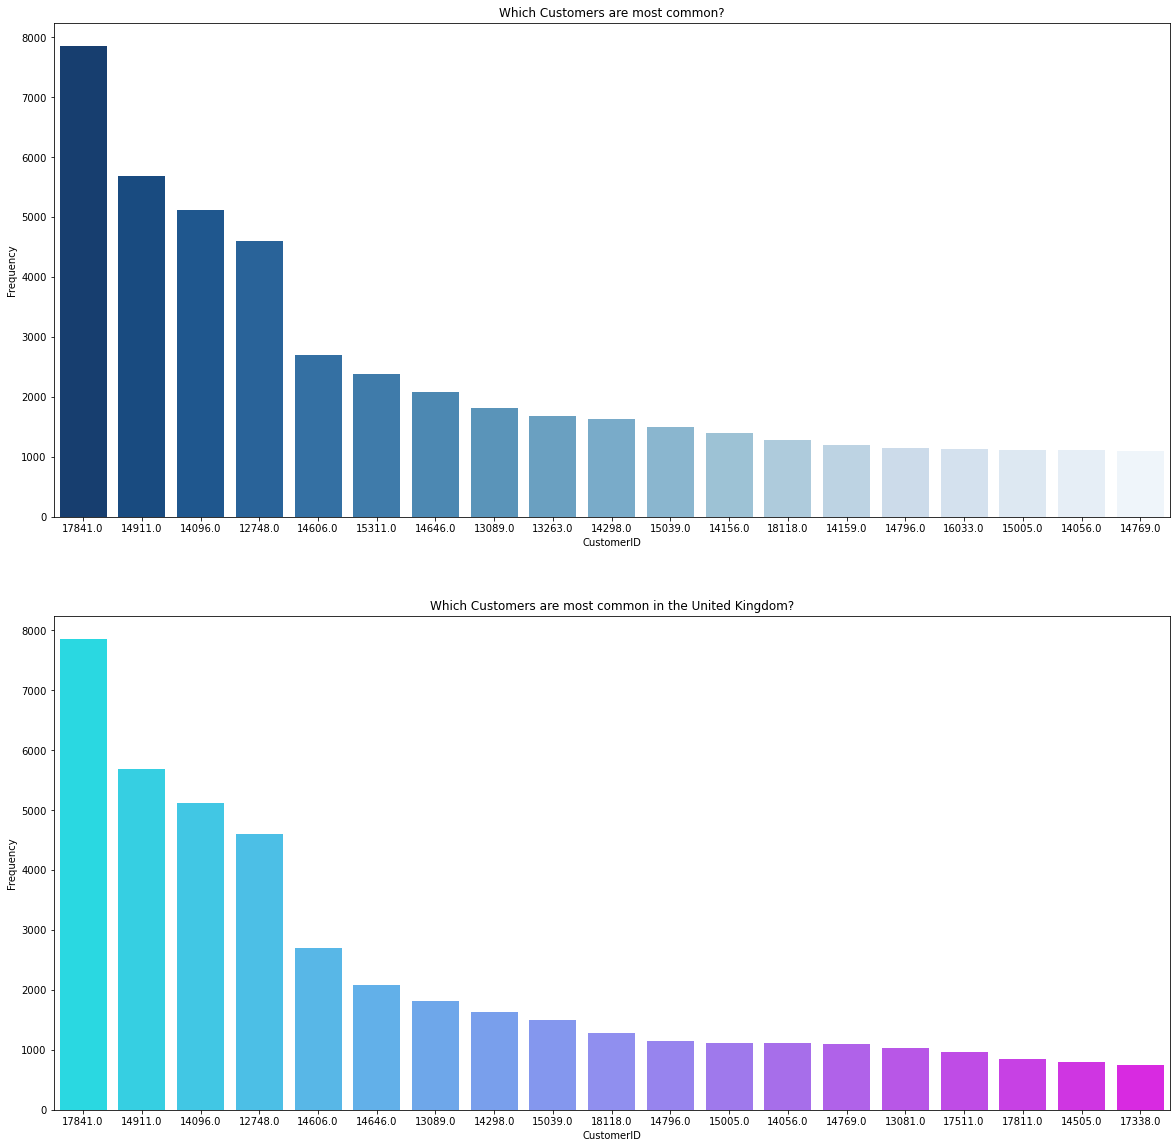

In [15]:
customer_frequency = dat.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
uk_customers = dat.groupby(dat['CustomerID']).size().where(dat['Country'] == 'United Kingdom').sort_values(ascending=False).iloc[0:19]
fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.barplot(customer_frequency.index,
            customer_frequency.values,
            ax = ax[0], palette="Blues_r", order=customer_frequency.index)
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("CustomerID")
ax[0].set_title("Which Customers are most common?");
sns.barplot(uk_customers.index,
            uk_customers.values,
            ax = ax[1], palette="cool", order=uk_customers.index)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("CustomerID")
ax[1].set_title("Which Customers are most common in the United Kingdom?");

It appears we have a few outliers in our top customers group where the top country is Ireland and the Netherlands.However, the majority are from the United Kingdom which makes sense due to the large difference in transactions between the United Kingdom and the rest of the countries in our dataset.

### Unit Price and Quantity

In [16]:
dat.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [17]:
#taking out unit price less than 0
dat = dat.loc[dat.UnitPrice > 0].copy()

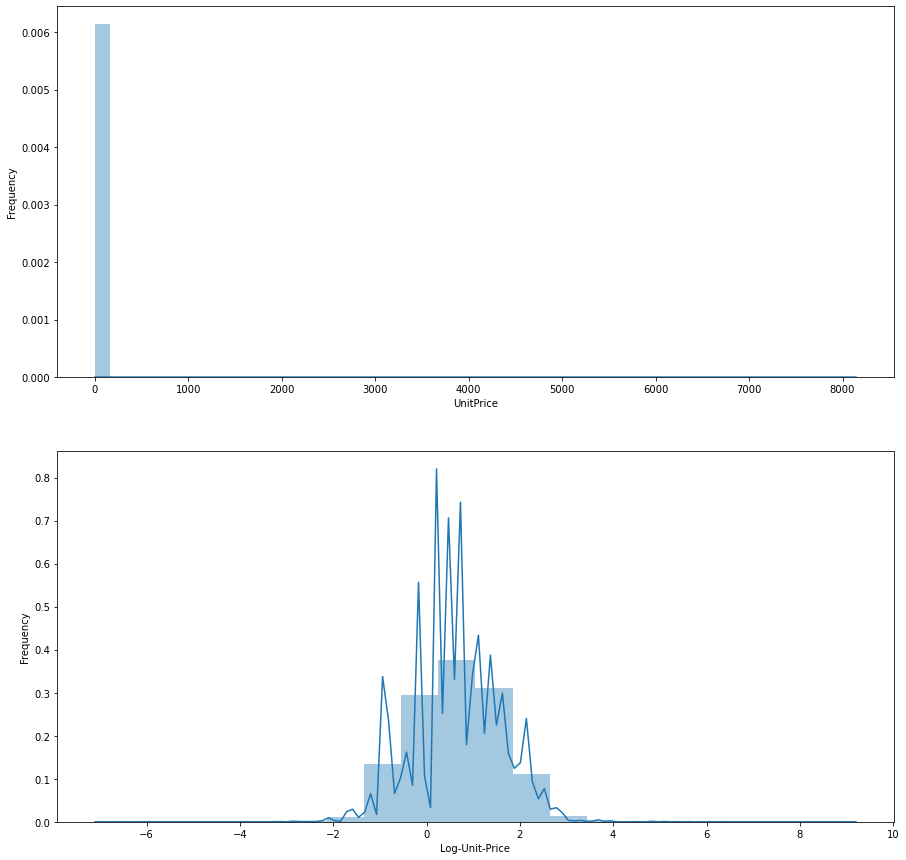

In [18]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(dat.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

From the graphs we can see that a large portion of the prices are quite small and we have a few outliers that are very large. Due to the high frequency of small transactions I will focus on the transactions with prices in the log-unit-price graph. To find the prices i will take the exponent of -2 and the exponent of 3 as the majority of the price are between these two log units.

In [19]:
np.exp(-2),np.exp(3)

(0.1353352832366127, 20.085536923187668)

We can see that the majority of our distribution lies between 0.1 and 20.1 so I will delete all outliers outside of this range

In [20]:
dat = dat.loc[(dat.UnitPrice > 0.1) & (dat.UnitPrice < 20)].copy()

In [21]:
dat.UnitPrice.describe()


count    396462.000000
mean          2.809563
std           2.783123
min           0.120000
25%           1.250000
50%           1.950000
75%           3.750000
max          19.960000
Name: UnitPrice, dtype: float64

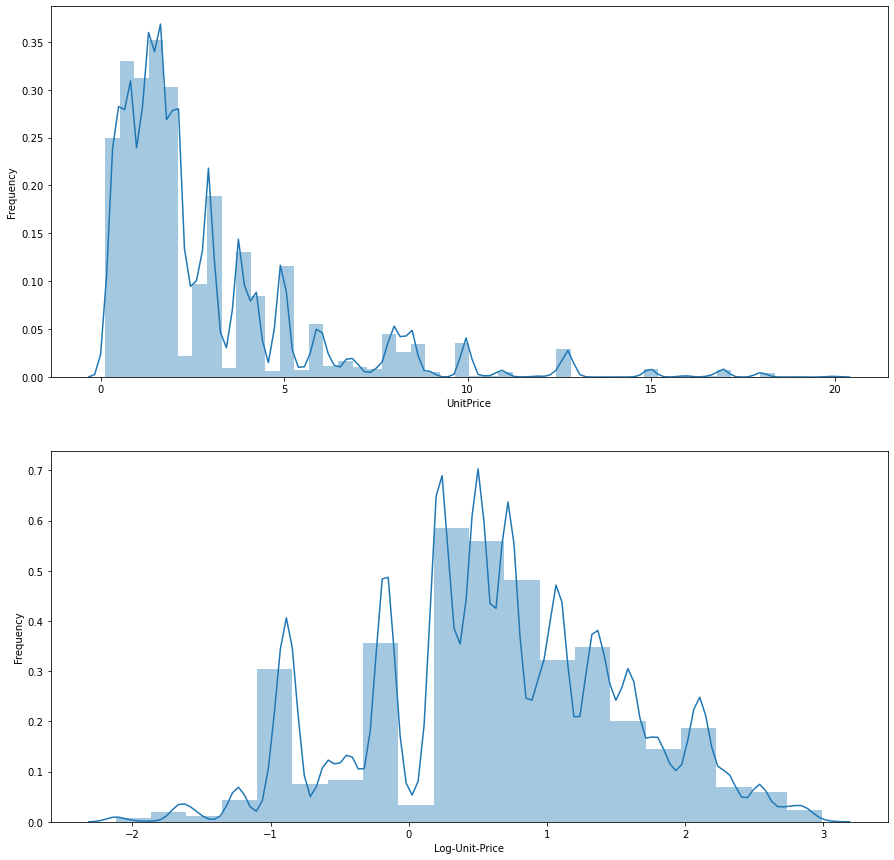

In [22]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(dat.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

Now are std is much smaller and we have a more evenly distributed graph. Our graph is still skewed to the right which is something to make note of for which we will deal with later. Now lets take a look at the Quantity column.

In [23]:
dat.Quantity.describe()


count    396462.000000
mean         12.933943
std         179.461050
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

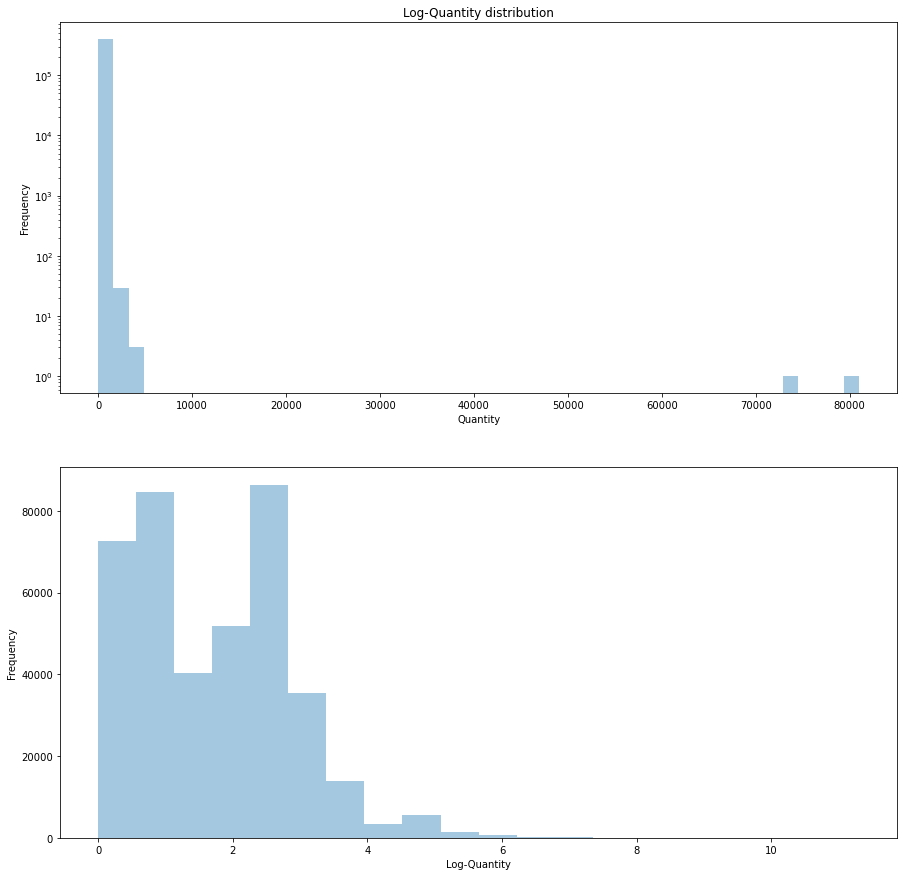

In [24]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(dat.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

From the graphs it looks like we have a small amount of outliers greater than 70000. lets take the exponent where Log-Quantity=4 as most of our distribution lies within this region



In [25]:
np.exp(4),np.quantile(dat.Quantity, 0.95)

(54.598150033144236, 36.0)

It looks like we will be able to keep more than 95% of our data with a max quantity set at 55. Lets take a look at our distribution after we drop the outliers

In [26]:
dat = dat.loc[dat.Quantity < 55].copy()

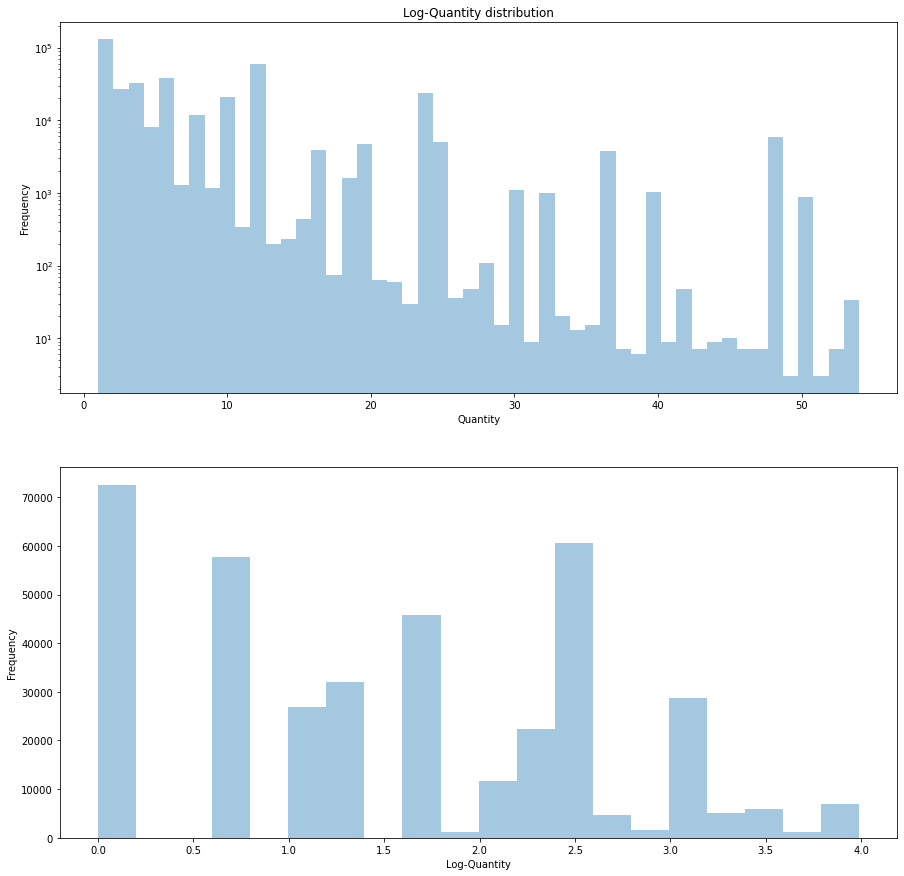

In [27]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(dat.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

Which months had the highest Revenue?¶


In [28]:
dat["Revenue"] = dat.Quantity * dat.UnitPrice

dat["Month"] = dat.InvoiceDate.dt.month

dat.groupby('Month').sum().sort_values(by='Revenue', ascending=False)

Quantity  UnitPrice    Revenue
Month                                
11       470243  169976.20  880963.29
10       377513  135997.49  706560.60
9        356305  108005.34  657074.10
12       334419  119359.91  652108.14
5        236606   84162.85  482348.18
8        239155   71903.84  429074.45
3        214524   76997.62  419788.80
6        219117   77073.04  414362.30
7        232788   69543.50  409171.27
4        185020   63982.61  341332.09
1        174273   61932.74  337532.43
2        157483   58603.97  316532.58

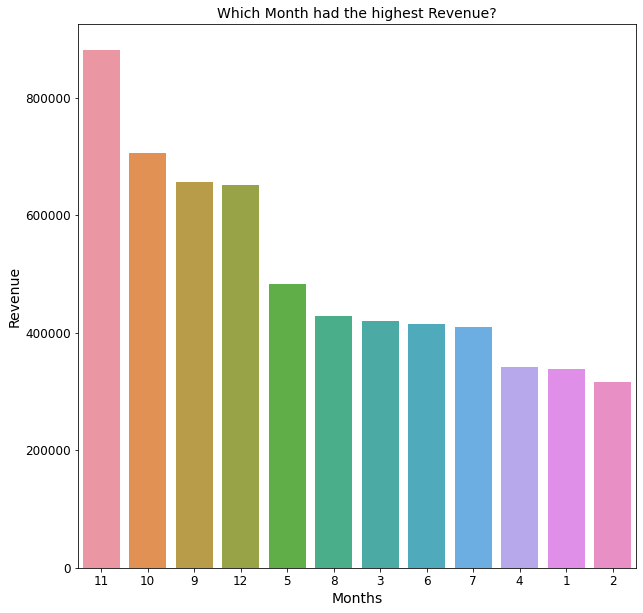

In [29]:
plt.rcParams.update({'font.size': 12})
z = dat.groupby('Month').sum().sort_values(by='Revenue',ascending=False)
x = z.index
y = z['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x, y, order=x)
plt.ylabel("Revenue", Size=14)
plt.xlabel("Months", Size=14)
plt.title("Which Month had the highest Revenue?", Size=14);

We can see that November is the highest revenue month for the company followed by October and then September. This could be because these are the months leading up to the holiday months where it is more likely people will be buying gifts and business increasing their inventory. It should be noted that the company considers many of their customers to be wholesalers indicating that customers are likely preparing for the holiday season by purchasing more products.

In [152]:
#What product contributed the most to revenue? Why?
df = dat[['StockCode','Revenue']].groupby('StockCode').sum().sort_values(by='Revenue', ascending=False).iloc[0:9]
df.reset_index(inplace=True)

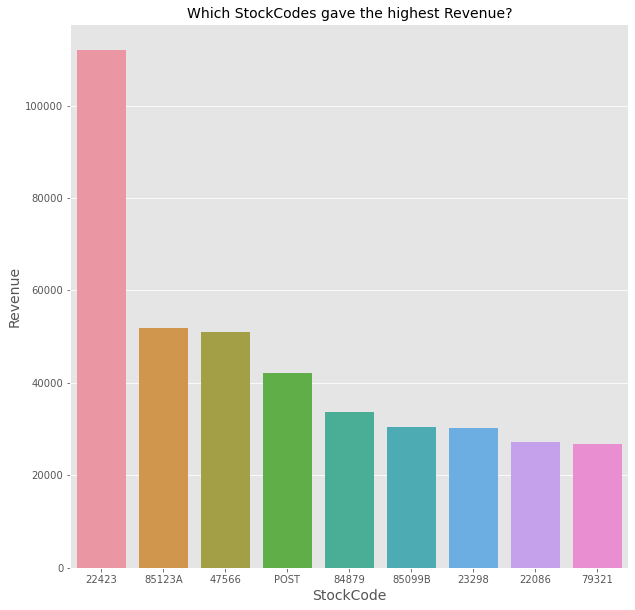

In [155]:
z = df.groupby('StockCode').sum().sort_values(by='Revenue',ascending=False)
x = z.index
y = z['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x, y, order=x)
plt.ylabel("Revenue", Size=14)
plt.xlabel("StockCode", Size=14)
plt.title("Which StockCodes gave the highest Revenue?", Size=14);

We can see that StockCode 22423 contributed the most to revenue by over $60000. Lets take a look at a sample of the transactions for StockCode 22423 to see if there are any clues that can explain why it's contribution to revenue is so high --it's high contribution to revenue would be the relatively high UnitPrice compared to the rest of the products. This allows it to generate more revenue in lower quantities being sold. The other data features seem to be relatively random and so without further information we can make any more inferences.

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
import plotly
plotly.offline.init_notebook_mode(connected=True)

from ipywidgets import interact, interactive, fixed, interact_manual,VBox,HBox,Layout
import ipywidgets as widgets
import datetime
from datetime import date


In [32]:
data = dat.copy()

In [45]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['Sales'] = data.Quantity*data.UnitPrice
data['Year']=data.InvoiceDate.dt.year
data['Month']=data.InvoiceDate.dt.month
data['Week']=data.InvoiceDate.dt.week
# data.InvoiceDate.dt.week
# wk = dt.isocalendar()[1]
data['Year_Month']=data.InvoiceDate.dt.to_period('M')
data['Hour']=data.InvoiceDate.dt.hour
data['Day']=data.InvoiceDate.dt.day
data['is_cancelled']=data.InvoiceNo.apply(lambda x: 'Yes' if x[0]=='C' else 'No')
data['weekday'] = data.InvoiceDate.dt.day_name()
data['Quarter'] = data.Month.apply(lambda m:'Q'+str(ceil(m/4)))
data['Date']=pd.to_datetime(data[['Year','Month','Day']])
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Revenue  Month  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom    15.30     12   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom    20.34     12   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom    22.00     12   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom    20.34     12   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom    20.34     12   

   Sales  Year Year_Month  Hour  Day is_cancelled    weekday Quarter  \
0  15.30  2010    2010-12     8    1           No  Wednesday      Q3   
1  20.34  2010    2010-12     8    1           No  Wednesday      Q3   
2  22.00  2010    2010-12     8    1           No  Wednesday      Q3   
3  20.34  2010    2010-12     8    1           No  Wednesday      Q3   
4  20.34  2010    2010-12     8    1           No  Wednesday      Q3   

        Date  Week  
0 2010-12-01    48  
1 2010-12-01    48  
2 2010-12-01    48  
3 2010-12-01    48  
4 2010-12-01    48

### Geographic sales view

In [46]:
df = px.data.gapminder()
df = df [['country','iso_alpha']]
data = pd.merge(data,df[['country','iso_alpha']],left_on='Country',right_on='country',how='left').drop(columns=['country'])
del df

In [47]:
grp_data = data.groupby(by='Country')['Sales'].sum().sort_values(ascending=False).reset_index()

fig = go.Figure(data=go.Choropleth(
    locations = grp_data['Country'],
    z = grp_data['Sales'],
    text = grp_data['Country'],
    colorscale = 'earth',
    locationmode = 'country names',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Sales',
))


fig.update_layout(
    title_text='Sales by country',
    geo=dict(showframe=False,showcoastlines=False,projection_type='equirectangular'),
    annotations = [dict(x=0.55,y=0.1,xref='paper',yref='paper',showarrow = False)])

fig.show()

del grp_data

#### United Kingdom has highest sales and it alone contributes 84% of total sales
#### United Kingdom, Netherlands, EIRE (Republic of Ireland) , Germany, France, Australia, Spain are 7 countries which as 95% of total sales
#### Netherlands has highest average sales per transaction compare to other countries
#### United Kingdom has performed consistently each quarter followed by Netherlands whereas Germany which was on 6th Rank in Q1 2011 achieved 3rd rank in Q4 2011

In [49]:
data_=data[data.is_cancelled=='No']
del data

In [50]:

sales_by_date = data_.groupby(by='Date')['Sales'].sum().reset_index()
fig = go.Figure(data=go.Scatter(x=sales_by_date.Date,y=sales_by_date.Sales
                                ,line = dict(color='black', width=1.5)))
fig.update_layout(xaxis_title="Date",yaxis_title="Sales",title='Daily Sales',template='ggplot2')
fig.show()

### Due to presence of anomaly in the data, we can see some spike in the trend. There is no more detail available so it will be difficult to anticipate that this spike is due to any events or promotion. For now, lets assume that it is a random event.

In [51]:
sales_by_hour = data_.groupby(by='Hour')['Sales'].sum().reset_index()
sales_by_weekday = data_.groupby(by='weekday')['Sales'].sum().reset_index()

fig = make_subplots(rows=1, cols=2,subplot_titles=("Total Hourly Sales", "Total Sales by Weekday"))
fig.add_trace(go.Bar(y=sales_by_hour.Hour, x=sales_by_hour.Sales,orientation='h'),row=1, col=1)
fig.add_trace(go.Bar(x=sales_by_weekday.weekday, y=sales_by_weekday.Sales),row=1, col=2)
fig.update_layout(height=700, width=800,template='ggplot2')
fig.update_xaxes(title_text="Sales", row=1, col=1)
fig.update_xaxes(title_text="Weekday", row=1, col=2)
fig.update_yaxes(title_text="Hours", row=1, col=1)
fig.update_yaxes(title_text="Sales", row=1, col=2)
fig.show()


del [sales_by_hour,sales_by_weekday]

#### 1 Hourly sales are normally distributed and with mean 709k.
#### 2 There is no pattern in day wise sales in a month.
#### 3 There is no business on Saturday.
#### 4 Average sales are consistent from Monday to Friday
#### 5 Sales starts at 6 in the morning and ends at 8 PM.
#### 6 Peak hours of sales are between 10 AM to 3 PM
#### 7 Monday and Tuesday Sales starts at 7 AM and close at 6 PM
#### 8 Wednesday and Friday sales start at 7 AM and close at 8 PM
#### 9 Business hours for Sunday is between 9 to 4 PM

In [53]:
customer_by_month1 = data_.groupby('CustomerID')['Date'].min().reset_index()
customer_by_month1['days'] = pd.TimedeltaIndex(customer_by_month1.Date.dt.day,unit="D")
customer_by_month1['Month'] = customer_by_month1.Date- customer_by_month1.days+pd.DateOffset(days=1)
customer_by_month1['Quarter_acquisition'] = customer_by_month1['Month'].dt.quarter.apply(lambda x:'Q'+str(x))
customer_by_month1['Year_acquisition'] = customer_by_month1['Month'].dt.year
customer_by_month = data_.groupby(by = customer_by_month1.Month)['CustomerID'].size().reset_index()
customer_by_month.sort_values(by ='Month',ascending=True,inplace=True)
customer_by_month['cum_customer'] = np.cumsum(customer_by_month.CustomerID)
customer_by_month['Month_1'] = customer_by_month['Month'].dt.strftime('%b-%y')

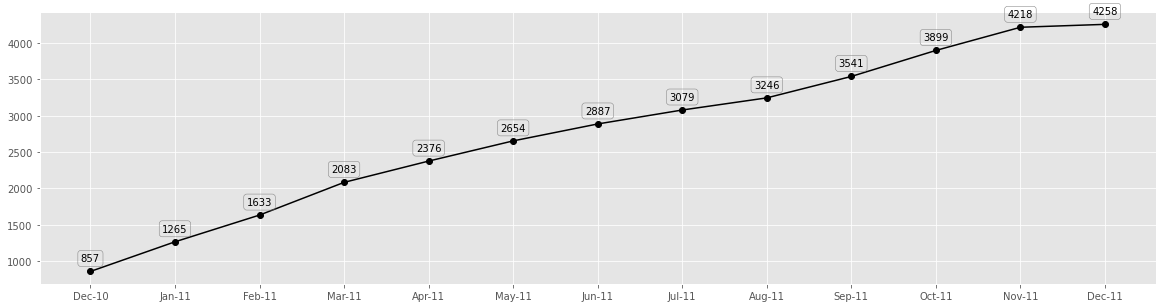

In [54]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.plot(customer_by_month.Month_1,customer_by_month.cum_customer,'bo-',color='black')

# zip joins x and y coordinates in pairs
for d,c in zip(customer_by_month['Month_1'],customer_by_month['cum_customer']):

    label = "{:.0f}".format(c)

    plt.annotate(label, 
                 (d,c), 
                 textcoords="offset points"
                 , bbox=dict(boxstyle="round", fc="none", ec="gray")
                 #,arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=10,rad=90")
                 ,xytext=(0,10),
                 ha='center') 
plt.show()

del customer_by_month

### This analysis exhibits the number of customer acquisition month over month and in the end of Nov 2011 there were approx. 4.2k customers who made their purchase during the given period.



### Rpeat Purchase
#### Most of customers made their next purchase after one or two months of first purchase
#### There were 28 customers who made their first purchase in Dec 2010 also made their next purchase after 12 months
#### 33 customers made their second purchase after 7 months of their first purchase in Mar 2011.

In [63]:
cust_date =data_.loc[~data_.CustomerID.isna(),['CustomerID','Date']].drop_duplicates()
cust_date.sort_values(by=['CustomerID','Date'],inplace=True)
cust_date['rnk'] = cust_date.groupby(by='CustomerID')['Date'].transform('rank', method='dense')
cust_date = cust_date[cust_date.rnk<=2]
cust_date['Purchase'] = cust_date.rnk.map({1:'First Purchase',2:'Second Purchase'})

# cust_purchase= cust_date.pivot(index='CustomerID',columns=['Purchase'],values='Date').reset_index()
# cust_date.pivot(index='CustomerID',values='Date',columns=['Purchase'],level=2).reset_index()
# df.pivot(index ='A', columns ='B', values =['C', 'A']) 
cust_date.pivot(index='CustomerID',columns='Purchase',values='Date').reset_index()
# cust_purchase['gap']=(cust_purchase['Second Purchase']- cust_purchase['First Purchase'])/ np.timedelta64(30, 'D')
# cust_purchase['gap'] = cust_purchase['gap'].fillna(0).apply(lambda x:ceil(x))

# days = pd.TimedeltaIndex(cust_purchase['First Purchase'].dt.day,unit="D")

# cust_purchase['First_Purchase_month']=cust_purchase['First Purchase']- days+pd.DateOffset(days=1)
# cust_purchase_grid = cust_purchase.pivot_table(index=['First_Purchase_month'],columns =['gap'],values='CustomerID',aggfunc='count').fillna(0)
# cust_purchase_grid = cust_purchase_grid.sort_index( ascending=False)

# fig = go.Figure(data=go.Heatmap(z=cust_purchase_grid
#                                 ,y=cust_purchase_grid.index,
#                    x=cust_purchase_grid.columns.tolist(),
#                    hoverongaps = True,colorscale='balance'))
# fig.update_xaxes(side="top",showticklabels = True,ticktext= cust_purchase_grid.columns.tolist())
# fig.update_layout(height=600,width=800,xaxis_title="Future Month of next Purchase after making first purchase"
#                   ,yaxis_title="Month of 1st Purchase",
#            yaxis=dict(autorange='reversed',showticklabels = True)
#                   ,autosize=False,template='ggplot2')

# fig.show()

ValueError: Index contains duplicate entries, cannot reshape

In [64]:
sales_by_hour = data_.groupby(by='Hour')['Sales'].mean().reset_index()
sales_by_weekday = data_.groupby(by='weekday')['Sales'].mean().reset_index()

fig = make_subplots(rows=1, cols=2,subplot_titles=("Avg Hourly Sales", "Avg Sales by Weekday"))
fig.add_trace(go.Bar(y=sales_by_hour.Hour, x=sales_by_hour.Sales,orientation='h'),row=1, col=1)
fig.add_trace(go.Bar(x=sales_by_weekday.weekday, y=sales_by_weekday.Sales),row=1, col=2)
fig.update_layout(height=700, width=800,template='ggplot2')
fig.update_xaxes(title_text="Sales", row=1, col=1)
fig.update_xaxes(title_text="Weekday", row=1, col=2)
fig.update_yaxes(title_text="Hours", row=1, col=1)
fig.update_yaxes(title_text="Sales", row=1, col=2)
fig.show()

del [sales_by_hour,sales_by_weekday]

#### Below charts shows average sales by hours varies whereas average sales between 7AM to 10 AM is higher compare to other hours of the day. In right hand side chart, we can see that average sales on Sunday and Monday is low compare to other weekdays.

In [157]:
LRFM = data_.groupby('CustomerID').agg(Frequency=pd.NamedAgg(column="InvoiceNo", aggfunc="nunique")
                                        ,Monetary=pd.NamedAgg(column="Sales", aggfunc="sum"),
                                         Recency = pd.NamedAgg(column='InvoiceDate',aggfunc='min')).reset_index()

length = data_.groupby('CustomerID')['Date'].max() - data_.groupby('CustomerID')['Date'].min()
length =  (length/np.timedelta64(1, 'D')).reset_index()
length.columns = ['CustomerID','Length_of_stay']
LRFM = LRFM.merge(length,on='CustomerID',how='inner')
del length

LRFM.head()

CustomerID  Frequency  Monetary             Recency  Length_of_stay
0     12347.0          7  48724.80 2010-12-07 14:57:00           365.0
1     12348.0          3   2407.20 2010-12-16 19:09:00           110.0
2     12349.0          1  17011.20 2011-11-21 09:51:00             0.0
3     12350.0          1   3532.80 2011-02-02 16:01:00             0.0
4     12352.0          7  16628.88 2011-02-16 12:33:00           260.0

In [159]:
e = data_['InvoiceDate'].min()
print('minimun :'+ str(e))

minimun :2010-12-01 08:26:00


In [161]:
LRFM['Recency'] = LRFM['Recency'].apply(lambda x : (x - e).days)

In [162]:
LRFM

CustomerID  Frequency  Monetary  Recency  Length_of_stay
0        12347.0          7  48724.80        6           365.0
1        12348.0          3   2407.20       15           110.0
2        12349.0          1  17011.20      355             0.0
3        12350.0          1   3532.80       63             0.0
4        12352.0          7  16628.88       77           260.0
...          ...        ...       ...      ...             ...
4253     18280.0          1   2167.20       96             0.0
4254     18281.0          1    969.84      193             0.0
4255     18282.0          2   2136.60      247           119.0
4256     18283.0         16  25138.56       36           334.0
4257     18287.0          3  21003.36      172           159.0

[4258 rows x 5 columns]

In [66]:
### 3 D View of Sales vs Length of Stay vs Frequency
### This chart shows that there are set of potential customers who has influential data points. 
### This gives an intuition of finding cluster in the data.

fig = go.Figure(data=[go.Scatter3d(x=LRFM.Monetary,y=LRFM.Length_of_stay,z=LRFM.Frequency,mode='markers'
                                   ,marker=dict(size=4,color='coral',colorscale='Viridis',opacity=0.8))])
fig.update_layout(margin=dict(l=1, r=2, b=1, t=1)
                  ,scene=dict(xaxis=dict(title='Sales')
                              ,yaxis=dict(title='Lenght of Stay')
                              ,zaxis=dict(title='Frequency')),width=800,height=500)
fig.show()


In [67]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE

In [163]:
X=LRFM.drop(columns = 'CustomerID')
error = []
silhouette = []
np.random.seed(12)
rng = range(2,20)
for i in rng:
    km = KMeans(n_clusters=i, init='random',n_init=20, max_iter=200,tol=.0001, random_state=12)
    km.fit(X)
    error.append(km.inertia_)
    lbls = km.fit_predict(X)
    silhouette.append(silhouette_score(X, lbls))

fig = make_subplots(rows=1, cols=2,subplot_titles=("Number of Cluster vs Error", "Number of Cluster vs Silhouette"))
fig.add_trace(go.Scatter(x=list(rng), y=error),row=1, col=1)
fig.add_trace(go.Scatter(x=list(rng), y=silhouette),row=1, col=2)
fig.update_layout(height=500, width=800,template='ggplot2')
fig.update_xaxes(title_text="Number of Clusters", row=1, col=1)
fig.update_xaxes(title_text="Number of Clusters", row=1, col=2)
fig.update_yaxes(title_text="Errors", row=1, col=1)
fig.update_yaxes(title_text="Silhouette Distance", row=1, col=2)
fig.show()

del [error,silhouette,rng,km,lbls,X]

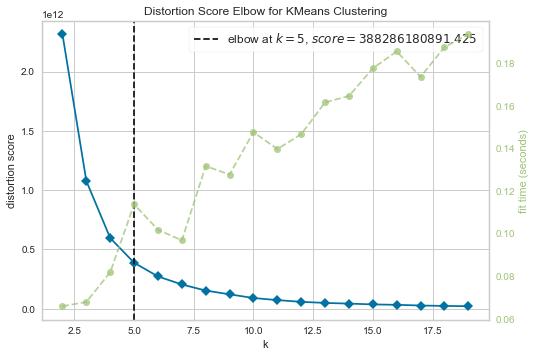

In [165]:
from yellowbrick.cluster import KElbowVisualizer
X=LRFM.drop(columns = 'CustomerID')

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [166]:
X=LRFM.drop(columns = 'CustomerID')
cluster_lbls = KMeans(n_clusters=5, random_state=12).fit_predict(X)
X['cluster'] = cluster_lbls
X['sample_silhouette_values'] = silhouette_samples(X, cluster_lbls)
X['txt']=X.cluster.apply(lambda x:'Cluster '+str(x))

In [167]:
df = X.groupby('cluster').agg({'cluster':'size', 'Monetary':'mean','Frequency':'mean','Length_of_stay':'mean'}) \
       .rename(columns={'cluster':'Size','Monetary':'Avg Sales','Frequency':'Avg Recency','Length_of_stay':'Avg Lenght of Stay'}) \
       .reset_index().sort_values(by = 'Avg Sales')

cluster_map ={'Cluster 4':'lightskyblue','Cluster 0':'lightskyblue','Cluster 8':'lightskyblue'
              ,'Cluster 6':'lightskyblue','Cluster 2':'lightskyblue',
             'Cluster 3':'orange','Cluster 7':'orange','Cluster 9':'orange'
              ,'Cluster 1':'olive','Cluster 5':'olive'}

txt =['Size = {0:.0f}'.format(i) for i in df.Size]
df['cluster']=df.cluster.apply(lambda x:'Cluster '+str(x))
df['Group']=df.cluster.map(cluster_map)

fig = make_subplots(rows=1, cols=3,subplot_titles=("Avg Sales", "Avg Recency",'Avg Lenght of Stay'))

fig.add_trace(go.Bar(y=df.cluster, x=df['Avg Sales'],hovertext=txt
                        ,text=txt,textposition='auto',marker_color=df.Group,orientation='h'),row=1, col=1)
fig.add_trace(go.Bar(y=df.cluster, x=df['Avg Recency'],hovertext=txt
                        ,text=txt,textposition='auto',marker_color=df.Group,orientation='h'),row=1, col=2)
fig.add_trace(go.Bar(y=df.cluster, x=df['Avg Lenght of Stay'],hovertext=txt
                        ,text=txt,textposition='auto',marker_color=df.Group,orientation='h'),row=1, col=3)

fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.8)
fig.update_layout(title_text='Cluster Size',width = 800,height=600,template='ggplot2'
                  ,font=dict(family="Courier New, monospace",size=10,color="RebeccaPurple"))

fig.show()

#### Charts show the group vs average sales and number of customers belong to the group. Customers from Cluster 1 and 5 can be considered on high priority and can be offered some promotions so that they can continue their association with business. Whereas customers from cluster 3, 7 and 9 can be treated as medium size customer.

#### For medium size customers we can understand their purchase pattern and provide some promotions accordingly.

#### In the end we have list of customers from remaining clusters who can be taken as seriously and if we see their length of stay is better than medium size customers but their order size and order frequency is very low. So, we may understand their purchases pattern, type of product they select, and we can offer them some discounts or vouchers, or we can do some cross sales with them.

In [71]:
#3 D view of clusters
fig = go.Figure(data=[go.Scatter3d(x=X.Monetary,y=X.Length_of_stay,z=X.Frequency,mode='markers'
                                   ,marker=dict(size=4,color=X.cluster
                                                ,colorscale='Viridis',opacity=0.8))])

# tight layout
fig.update_layout(margin=dict(l=1, r=2, b=1, t=1)
                  ,scene=dict(xaxis=dict(title='Sales')
                              ,yaxis=dict(title='Lenght of Stay')
                              ,zaxis=dict(title='Recency')),width=700,height=500)
fig.show()


In [168]:
prpxlt = [10,15,30,40]
fig = make_subplots(rows=2, cols=2,subplot_titles=['perplexity = %s'%i for i in prpxlt])

for i, prpxlt_ in enumerate(prpxlt):
    X_tsne = TSNE(n_components=2, init='random',
                         random_state=0, perplexity=prpxlt_).fit_transform(X[['Frequency', 'Monetary', 'Length_of_stay','Recency']])
    if i%2==0:
        c=2
    else:
        c=1
    r = (i)//2+1
    fig.add_trace(go.Scatter(x=X_tsne[:,0],y=X_tsne[:,1]
                                    , mode='markers',marker=dict(size=4,color=X.cluster
                                                ,colorscale='Viridis',opacity=0.8),text=X.txt),row=r, col=c)

    fig.update_xaxes(title_text="Component 1", row=r, col=c)
    fig.update_yaxes(title_text="Component 2", row=r, col=c)
    
fig.update_layout(height=600, width=800)
fig.show()

del [X_tsne,fig]


## t-distributed Stochastic Neighbor Embedding.
### t-SNE is a method to visualize high dimensional data in two dimensions if the value of perplexity (It is the value to select nearest neighbors which will generate different samples) is more than 30 then algorithm is able to separate the points clearly.

In [130]:
from sklearn.preprocessing import MinMaxScaler
temp = X.drop(columns=['cluster','sample_silhouette_values','txt'])
scaler1 = MinMaxScaler()
scaled_data = pd.DataFrame(scaler1.fit_transform(temp),columns=['Frequency', 'Monetary', 'Length_of_stay'])
scaled_data

Frequency  Monetary  Length_of_stay
0      0.029557  0.069458        0.978552
1      0.009852  0.003384        0.294906
2      0.000000  0.024217        0.000000
3      0.000000  0.004990        0.000000
4      0.029557  0.023672        0.697051
...         ...       ...             ...
4253   0.000000  0.003042        0.000000
4254   0.000000  0.001334        0.000000
4255   0.004926  0.002998        0.319035
4256   0.073892  0.035811        0.895442
4257   0.009852  0.029912        0.426273

[4258 rows x 3 columns]

# Initialise TSNE
model = TSNE(random_state=1)
transformed = model.fit_transform(temp)
    
# Plot t-SNE
plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

In [170]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

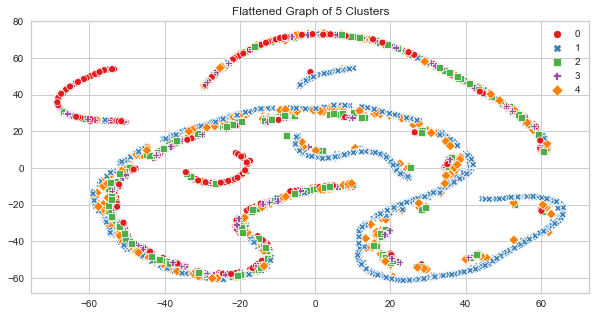

In [171]:
plt.figure(figsize=(10,5))
df_rfm_k4 = kmeans(scaled_data, 5, temp)

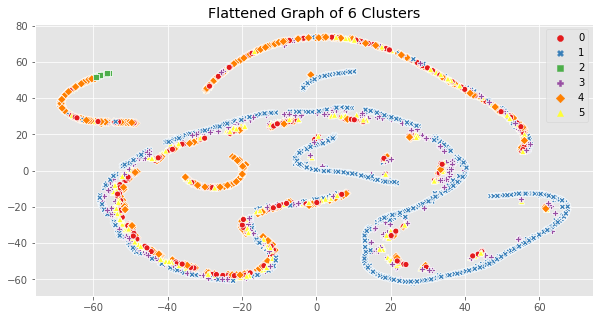

In [133]:
plt.figure(figsize=(10,5))
df_rfm_k4 = kmeans(scaled_data, 6, temp)

In [142]:
import ipyvolume as ipv
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from ipywidgets import ColorPicker, VBox, \
    interact, interactive, fixed
import struct

In [143]:
def handle_cp_change(labels, **groups):
    group_ids = [int(g.split(' ')[1]) for g in groups.keys()]
    group_color = {k: hex_to_rgb(get_cp_value(cp)) for k, cp in zip(group_ids, groups.values())}
    colors = list(map(lambda x: group_color[x], labels))
    scatter.color = colors
def get_cp_value(cp):
    if type(cp) == ColorPicker:
        return cp.value
    else:
        return cp


In [144]:
def color_scatter_with_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    color_pickers = {f'group {k}': ColorPicker(value=avaliable_colors[k%7], description=f'group {k}') 
                     for k in range(n_clusters)}
    handle_cp_change(labels=list(labels), **color_pickers)
    return interact(handle_cp_change, labels=fixed(list(labels)) , **color_pickers)

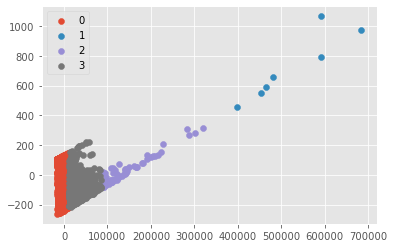

In [146]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = temp.copy()
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

## Time Series Forecasting

In [73]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf


In [74]:
ds_weekly = data_.groupby(by=['Year','Week'])['Sales'].sum().reset_index()
ds_daily = data_.groupby(by=['Date'])['Sales'].sum().reset_index()

In [75]:
def plot_(t_train,t_test,x_train,x_test,x_train_pred,x_test_pred,forecast,title='Weekly'):
    xt = (max(t_test)+np.arange(len(forecast)))+1
    fig_train=go.Scatter(name='Train : Actual ',x=t_train,y=x_train,showlegend=True)
    fig_trian_pred=go.Scatter(name='Train : Predict',x=t_train,y=x_train_pred,showlegend=True)
    fig_test=go.Scatter(name='Test : Actual',x=t_test,y=x_test,showlegend=True)
    fig_test_pred=go.Scatter(name='Test : Predict',x=t_test,y=x_test_pred,showlegend=True)
    fig_forecast=go.Scatter(name='Forecast',x=xt,y=forecast,showlegend=True)

    fig = go.Figure([fig_train,fig_trian_pred,fig_test,fig_test_pred,fig_forecast])
    fig.update_layout(xaxis_title=title,yaxis_title="Sales",title=title +' Trend'
                      ,height=400,hovermode="x",template='ggplot2')
    fig.show()

In [76]:
fig = go.Figure(data=[go.Scatter(x=ds_weekly.index,y=ds_weekly.Sales)])
fig.update_layout(xaxis_title="Week",yaxis_title="Sales",title='Weekly Trend',height=400,template='ggplot2')
fig.show()

In [78]:
# Weekly: Test of Stationarity of Actual Series
output = adfuller(ds_weekly.Sales)
print('***************************Week*********************************')
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is extremely high which indicates that we are fail to reject null hypothesis " \
      "and can conclude that series is not stationary ")

***************************Week*********************************
ADF Statistic: -2.19 and P value:0.21112
As we can see the p value is extremely high which indicates that we are fail to reject null hypothesis and can conclude that series is not stationary 


In [79]:
# Weekly: Test of Stationarity with 1 differencing of series
d=1
print('***************************Week*********************************')
# series = ds.Sales
series = ds_weekly.Sales.diff(d)# - ds.Sales.rolling(window=12).mean()
series = series.dropna()
output = adfuller(series)

print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis and conclude " \
      " that series is stationary with rolling mean difference at lag of 12 ")

***************************Week*********************************
ADF Statistic: -6.47 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis and conclude  that series is stationary with rolling mean difference at lag of 12 


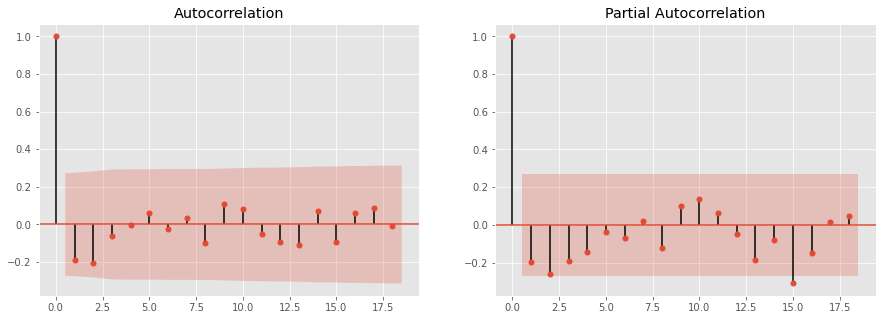

In [80]:
# Weekly: PACF & ACF
fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(series, ax=ax[0])
plot_pacf(series, ax=ax[1])
plt.show()

In [82]:
# Weekly: Train & Test Split
series=ds_weekly.Sales
split_time = 45
time=np.arange(len(ds_weekly))
xtrain=series[:split_time]
xtest=series[split_time:]
timeTrain = time[:split_time]
timeTest = time[split_time:]
print('Full Set Size ',series.shape)
print('Training Set Size ',xtrain.shape)
print('Testing Set Size ',xtest.shape)

Full Set Size  (53,)
Training Set Size  (45,)
Testing Set Size  (8,)


In [83]:
# Weekly: ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(xtrain, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   45
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -615.842
Date:                Sat, 23 Jan 2021   AIC                           1239.684
Time:                        22:51:45   BIC                           1246.821
Sample:                             0   HQIC                          1242.331
                                 - 45                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2381      0.431      0.552      0.581      -0.607       1.083
ma.L1         -0.5284      0.479     -1.102      0.270      -1.468       0.411
ma.L2         -0.2316      0.224     -1.032      0.3

In [84]:
ytrain_pred = model_fit.predict()
ytest_pred = model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('MSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('MSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = model_fit.forecast(20, alpha=0.05)
plot_(t_train = timeTrain,t_test = timeTest,x_train = xtrain,x_test = xtest,x_train_pred = ytrain_pred
      ,x_test_pred = ytest_pred,forecast = forecast,title='Weekly')

MSE Train : 340296.620068953
MSE Test : 539519.7507324067


In [85]:
# WEEKLY: SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
s_model = SARIMAX(endog=xtrain , order=(1, 1, 2), seasonal_order=(1, 1, 1, 3), trend='c')
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   45
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 3)   Log Likelihood                -577.571
Date:                             Sat, 23 Jan 2021   AIC                           1169.143
Time:                                     22:52:31   BIC                           1181.138
Sample:                                          0   HQIC                          1173.511
                                              - 45                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.225e+04   5.52e+04      0.403      0.687    -8.6e+04     1.3e+05
ar.L1         -0.8169      

In [86]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest),end=max(timeTest),dynamic=True)
print('RMSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain)**2)))
print('RMSE Test :',np.sqrt(np.mean((ytest_pred - xtest)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)
plot_(t_train = timeTrain,t_test = timeTest,x_train = xtrain,x_test = xtest,x_train_pred = ytrain_pred
      ,x_test_pred = ytest_pred,forecast = forecast,title='Weekly')

RMSE Train : 421873.4961373025
RMSE Test : 466639.3078647117


### # Daily: Trend

In [87]:
# Daily: Trend
fig = go.Figure(data=[go.Scatter(x=ds_daily.Date,y=ds_daily.Sales)])
fig.update_layout(xaxis_title="Date",yaxis_title="Sales",title='Daily Trend',height=400,template='ggplot2')
fig.show()

In [89]:
# Daily: Test of Stationarity of Actual Series
print('\n***************************Daily*********************************')
output = adfuller(ds_daily.Sales)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is extreemly high which indicates that we are fail to reject null hypothesis " \
      "and can conclude that series is not stationary ")


***************************Daily*********************************
ADF Statistic: -1.48 and P value:0.54474
As we can see the p value is extreemly high which indicates that we are fail to reject null hypothesis and can conclude that series is not stationary 


In [90]:
# Daily: Test of Stationarity with 1 differencing of series
print('\n***************************Daily*********************************')
series_date = ds_daily.Sales.diff(d)
series_date = series_date.dropna()
output = adfuller(series_date)
print('ADF Statistic: {0:.2f} and P value:{1:.5f}'.format(*output))
print("As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis and conclude " \
      " that series is stationary with rolling mean difference at lag of 12 ")


***************************Daily*********************************
ADF Statistic: -5.85 and P value:0.00000
As we can see the p value is close to zero which is less than .05 hence we reject null hypothesis and conclude  that series is stationary with rolling mean difference at lag of 12 


In [91]:
# Daily: Train & Test Split
series_date=ds_daily.Sales
split_time = 250
time_d=np.arange(len(ds_daily))
xtrain_d=series_date[:split_time]
xtest_d=series_date[split_time:]
timeTrain_d = time_d[:split_time]
timeTest_d = time_d[split_time:]
print('Full Set Size ',series_date.shape)
print('Training Set Size ',xtrain_d.shape)
print('Testing Set Size ',xtest_d.shape)

Full Set Size  (305,)
Training Set Size  (250,)
Testing Set Size  (55,)


In [92]:
# Daily: ARIMA Model
s_model = ARIMA(endog=xtrain_d , order=(1, 1, 1))
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3120.151
Date:                Sat, 23 Jan 2021   AIC                           6246.302
Time:                        22:54:42   BIC                           6256.854
Sample:                             0   HQIC                          6250.549
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2327      0.082      2.822      0.005       0.071       0.394
ma.L1         -0.8774      0.040    -22.026      0.000      -0.955      -0.799
sigma2      5.064e+09   5.05e-12      1e+21      0.0

In [93]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('MSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('MSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(20, alpha=0.05)

plot_(t_train = timeTrain_d,t_test = timeTest_d,x_train = xtrain_d,x_test = xtest_d,x_train_pred = ytrain_pred
      ,x_test_pred = ytest_pred,forecast = forecast,title='Daily')

MSE Train : 70447.68407406675
MSE Test : 100023.22105042859


In [95]:
# Daily: SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
s_model = SARIMAX(endog=xtrain_d , order=(1, 1, 1), seasonal_order=(1, 1, 2, 12), trend='t')
s_model_fit=s_model.fit()
print(s_model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   Sales   No. Observations:                  250
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -2977.315
Date:                                 Sat, 23 Jan 2021   AIC                           5968.630
Time:                                         22:55:12   BIC                           5992.907
Sample:                                              0   HQIC                          5978.415
                                                 - 250                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          2.3848      7.365      0.324      0.746     -12.049      16

In [96]:
ytrain_pred = s_model_fit.predict()
ytest_pred = s_model_fit.predict(start=min(timeTest_d),end=max(timeTest_d),dynamic=True)

print('MSE Train :',np.sqrt(np.mean((ytrain_pred - xtrain_d)**2)))
print('MSE Test :',np.sqrt(np.mean((ytest_pred - xtest_d)**2)))
forecast = s_model_fit.forecast(30, alpha=0.05)
xt = max(timeTest_d)+np.arange(len(forecast))

plot_(t_train = timeTrain_d,t_test = timeTest_d,x_train = xtrain_d,x_test = xtest_d,x_train_pred = ytrain_pred
      ,x_test_pred = ytest_pred,forecast = forecast,title='Daily')

MSE Train : 73856.75954481283
MSE Test : 200453.7556374608


8.931265651218505

In [97]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.api import het_goldfeldquandt
from sklearn.metrics import r2_score

In [98]:
#Split the data
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(LRFM[['Frequency', 'Length_of_stay']],LRFM.Monetary
                                             ,test_size=.3,random_state=49,shuffle=True)
print(xtrain1.shape)
print(xtest1.shape)

(2980, 2)
(1278, 2)


In [99]:
#Log Log Model
#After several iteration I saw that Log-Log model seems better fit on the data which improves R square and following are all assumptions of regression. Please check chart of residual vs predicted for all assumption tests

from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(2)
# xtest = poly.fit_transform(xtest1)
# xtrain = poly.fit_transform(xtrain1)

inp_test=sm.add_constant(np.log1p(xtest1))
inp_train=sm.add_constant(np.log1p(xtrain1))
ytrain=np.log1p(ytrain1)
ytest=np.log1p(ytest1)
ols=sm.OLS(ytrain,inp_train)
model=ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2830.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:01:45   Log-Likelihood:                -3283.9
No. Observations:                2980   AIC:                             6574.
Df Residuals:                    2977   BIC:                             6592.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.0014      0.030    232.

In [172]:
#Interpration
print('Below are the interprataion of all 2 coeficients')
print('if customers increase the frequency of purchase by 1 percent then we can expect that sales will increase by 1.3%')
print('As customers are staying longer with business then we can expect that sales will increase by 0.07%')

Below are the interprataion of all 2 coeficients
if customers increase the frequency of purchase by 1 percent then we can expect that sales will increase by 1.3%
As customers are staying longer with business then we can expect that sales will increase by 0.07%


In [101]:
#Get Error
ytrain_pred=model.predict(inp_train)
ytest_pred=model.predict(inp_test)

train_res=ytrain-ytrain_pred
test_res=ytest-ytest_pred

train_mse= np.mean(train_res**2)
test_mse= np.mean(test_res**2)

print('Train MSE:{0:.4f}'.format(train_mse))
print('Test MSE:{0:.4f}'.format(test_mse))

Train MSE:0.5305
Test MSE:0.5655


In [102]:
#Get R square
r2_train=r2_score(ytrain,ytrain_pred)
r2_test=r2_score(ytest,ytest_pred)
print('R square Train:{0:.4f}'.format(r2_train))
print('R square Test:{0:.4f}'.format(r2_test))

R square Train:0.6553
R square Test:0.6310


In [103]:
#Linearrainbow test
#H0 : Part of the data is Linear

#Ha : Independent features does not have linear relation with target feature

pval=linear_rainbow(res=model,frac=0.5)[1]
print('P value {0:.2f}'.format(pval))

P value 0.39


In [104]:
#Homoscadastic -- Uniform variance
#H0 : model is Homoscadastic

#Ha : model is Heteroskedastic

homoscad = het_goldfeldquandt(train_res,inp_train)[1]
print('P Value {0:.2f}'.format(homoscad))

P Value 0.38


In [105]:
#Plot between Actual and predicted to check relationship
fig = make_subplots(rows=1, cols=2,subplot_titles=['Train','Test'])
fig.add_trace(go.Scatter(x=ytrain,y=ytrain_pred, mode='markers'
                         ,marker=dict(size=4,colorscale='Viridis',opacity=0.8)),row=1, col=1)
fig.add_trace(go.Scatter(x=ytest,y=ytest_pred, mode='markers'
                         ,marker=dict(size=4,colorscale='Viridis',opacity=0.8)),row=1, col=2)
fig.update_xaxes(title_text="Actual", row=1, col=1)
fig.update_yaxes(title_text="Predicted", row=1, col=1)
fig.update_xaxes(title_text="Actual", row=1, col=2)
fig.update_yaxes(title_text="Predicted", row=1, col=2)
fig.update_layout(height=400, width=800,template='ggplot2')
fig.show()

Test of Assumptions of Regression
To meet all assumptions of linear regression below are the criteria must be followed

Normality - Error Must be normally distributed

To test this assumption, we can run statistical tests or simply can take skewness of residual and can accept it as normally distributed if skewness is -.5 to +.5
Independence - Residual must not be autocorrelated

To test this assumption, we can check Durbin Watson value
if it is = 2, then there is no autocorrelation among residual points.
if it is 0< Durbin Watson <2 then there is Positive autocorrelation
if it is 2< Durbin Watson <4. Negative auto correlation
For standard practice Durbin Watson value between 1.5 and 2.5 is acceptable range to pass this test
Homoscedasticity - There should be uniform variance in error with respect target variable
Linearity -The relationship between X and the mean of Y is linear.

In [106]:
textstr = "<br>".join(("SKEW={:.2f}".format(train_res.skew())
                     ,'Linearity Test P value={:.2f}'.format(pval)
                    ,'Homoscadastic Test P value={:.2f}'.format(homoscad)
                    ,'Durbin Watson value = {:.2f}'.format(durbin_watson(train_res))
                    ,'Train MSE ={:.3f}'.format(train_mse)
                    ,'Test MSE ={:.3f}'.format(test_mse)
                    ,'R square Train ={:.3f}'.format(r2_train)
                    ,'R square Test ={:.3f}'.format(r2_test)))

fig= px.scatter(x=ytrain,y=train_res,marginal_y="histogram",
               marginal_x="histogram", trendline="ols")

fig.update_layout(title="Test of Assumptions",xaxis_title="Predicted",yaxis_title="Residual",
                            font=dict(family="Courier New, monospace",size=10,color="RebeccaPurple"))

fig.add_annotation(x=4,y=4,xref="x",yref="y",text=textstr,showarrow=False,font=dict(size=10)
                   ,align="left",ax=20,ay=-30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="snow",opacity=0.8)
fig.show()